## Greenhouse Gas (GHG) Project

**The UK government has committed to reducing greenhouse gas (GHG) emissions to net-zero by 2050 following recommendations made by the Committee on Climate Change. This change to legislation came into force on 27 June 2019. Below I made a model which investigates how GHG has changed over time and evaluate the government's target along with many different GHG visualisations.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

*Data = ONS atmospheric emissions: https://www.ons.gov.uk/economy/environmentalaccounts/datasets/ukenvironmentalaccountsatmosphericemissionsgreenhousegasemissionsbyeconomicsectorandgasunitedkingdom*

**First, organising and having the right layout of our data was particularly important since directly importing gave untidy Dataframes. This was obtained simply by extracting required data and placing it in different excel file or sheet. Once I had my desired data to work with, I transposed and added suitable total columns.**

In [2]:
df = pd.read_excel('intern_data2.xlsx', sheet_name='Sheet1')
df.head()

,0,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade; repair of motor vehicles and motorcycles,Transport and storage,Accommodation and food services,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers; undifferentiated goods and services-producing activities of households for own use,Consumer expenditure,Total_per_Year
0,1990,54667.9,46561.7,180059.7,217166.6,67600.2,9499.0,11683.0,65461.7,2776.2,...,2468.4,2651.2,11052.7,5499.6,5756.9,2324.9,1056.4,58.1,142316.6,830696.6
1,1991,54356.7,47082.0,181189.9,213890.9,69114.7,9476.0,12069.7,65977.1,3229.6,...,2680.2,2801.0,10359.0,5827.4,6081.8,2386.7,1161.8,58.5,150965.6,840936.5
2,1992,53949.2,47618.5,174062.0,201849.5,69347.9,9590.9,11890.2,67046.8,3027.2,...,2602.8,2782.2,10504.4,5970.6,6443.9,2031.1,1130.0,59.9,149142.6,821213.1
3,1993,53149.4,47244.1,168507.4,184355.7,69583.6,9737.5,12145.5,68347.1,3219.0,...,2498.9,2878.9,10722.7,5072.5,6126.7,2191.2,1184.9,61.2,154158.6,803452.2
4,1994,54274.5,42960.3,170908.6,180890.8,69818.8,10194.3,12536.3,69241.2,3206.1,...,2555.4,2980.9,10068.0,4534.3,6197.4,2133.4,1184.8,64.5,149261.7,795337.3


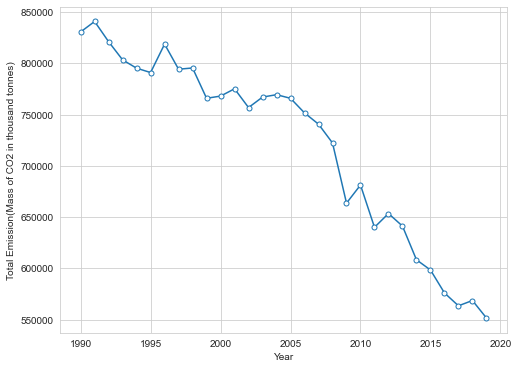

In [32]:
#ploting year column against total GHG emission of all industry section and groups
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))
plt.plot(df[0], df['Total_per_Year'], marker='o', markersize=5, mfc='white')
plt.xlabel('Year')
plt.ylabel('Total Emission(Mass of CO2 in thousand tonnes)')
plt.show()

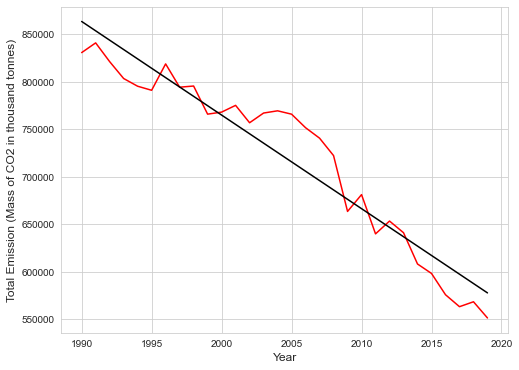

In [31]:
x = np.array(df[0])
y = np.array(df['Total_per_Year'])
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(8, 6))
plt.plot(df[0], df['Total_per_Year'], color='red')
plt.plot(x, m*x+b, color='black')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Emission (Mass of CO2 in thousand tonnes)', fontsize=12)
plt.show()

In [5]:
print('Therefore in five years(2024), total emission = ', (m*2024 + b).round())

print('Estimated year where the GHG emission will be 0 = ', (-b/m).round())

Therefore in five years(2024), total emission =  528671.0
Estimated year where the GHG emission will be 0 =  2078.0


In [6]:
#I wanted to see how well I fitted my line, so I calculated chi-squared value to test this
observed = np.array(df['Total_per_Year'])
expected = [(m*x + b) for x in range(1990, 2020, 1)]

chi_squared = (((observed-expected)**2)/expected).sum()
print('The Value of Chi Square = ', chi_squared.round())

The Value of Chi Square =  28962.0


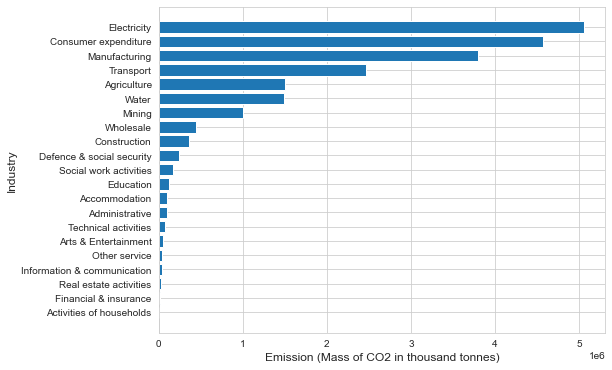

In [30]:
#I was also curious to see which industry affected the most
each_industry_total = list(df.sum()[1:-1].sort_values(ascending=True))

each_industry = ['Activities of households', 'Financial & insurance', 'Real estate activities', 'Information & communication', 
                 'Other service', 'Arts & Entertainment', 'Technical activities', 'Administrative', 'Accommodation', 'Education',
                 'Social work activities', 'Defence & social security', 'Construction', 'Wholesale', 'Mining', 'Water',
                'Agriculture', 'Transport', 'Manufacturing', 'Consumer expenditure', 'Electricity']
plt.figure(figsize=(8, 6))
plt.barh(each_industry, each_industry_total, )
plt.xlabel('Emission (Mass of CO2 in thousand tonnes)', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.show()

**Figure 2 concludes that it is most logical to target departments such as manufacturing or transportation first in trying to reduce emissions. According to my regression line it is seen that we’ll have 0 emissions by approx. 2078. If UK government were to achieve its ambitious target of net-zero emission by 2050 then they certainly need to put in more effort. Using Figure 2 we see that electricity is significantly affecting us, and some fundamental changes can be made such as using renewable energy, promoting more hybrid cars/bicycles. The government may do this through more campaigning and education. To deal with manufacturing we must stop giving subsidies to factories or discourage the use of heavy fossil fuels.**

In [8]:
df2 = pd.read_excel('intern_data2.xlsx', sheet_name='Sheet2')
df2.head()

,Year,Total CO2 emissions,Total CH4 emissions,Total N2O emissions,Total HFC emissions,Total PFC emissions,Total NF3 emissions,Total SF6 emissions
0,1990,637165.2,129180.0,46984.8,14399.5,1651.4,0.4,1315.5
1,1991,646096.2,129895.9,47192.9,15008.5,1385.0,0.5,1357.5
2,1992,631454.6,129735.0,42306.8,15625.8,690.2,0.5,1399.9
3,1993,618872.8,128243.0,38106.7,16399.5,602.6,0.6,1227.1
4,1994,616015.1,121383.3,38755.8,17301.0,611.2,0.7,1270.2


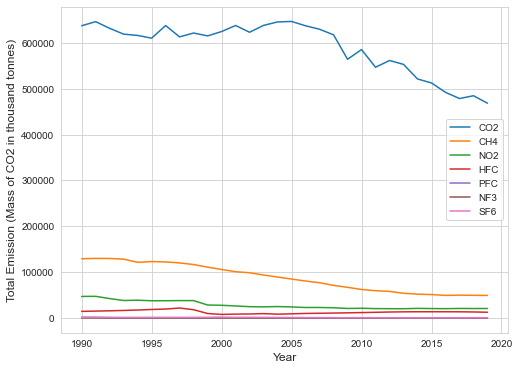

In [34]:
# History of each gas, and which one was emitted the most
plt.figure(figsize=(8, 6))
for i in df2.columns[1:]:
    plt.plot(df2['Year'], df2[i])
plt.legend(labels=['CO2', 'CH4', 'NO2', 'HFC', 'PFC', 'NF3', 'SF6'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Emission (Mass of CO2 in thousand tonnes)', fontsize=12)
plt.show()

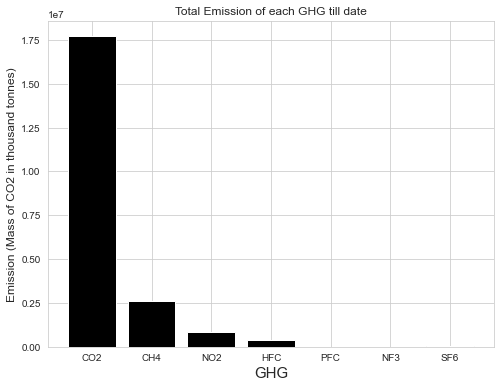

In [35]:
each_GHG_total = list(df2.sum()[1:])
GHG=['CO2', 'CH4', 'NO2', 'HFC', 'PFC', 'NF3', 'SF6']
fig1 = plt.figure(figsize=(8, 6))
plt.bar(GHG, each_GHG_total, color='black')
plt.xlabel('GHG', fontsize=15)
plt.ylabel('Emission (Mass of CO2 in thousand tonnes)', fontsize=12)
plt.title('Total Emission of each GHG till date', fontsize=12)
plt.show()

**One critical reason for carbon dioxide’s extensive magnitude is deforestation, with population, this keeps increasing and not only UK, but other developed countries should invest more in this topic.**